In [48]:
import pandas as pd
import numpy as np

In [49]:
# Load the data
file = 'C:/Users/Lajpat Rai/Desktop/Ryseron Data Science Diploma/CIND820 Project/data.csv'
df = pd.read_csv(file)
df.head() # let' see first 5 rows

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


# 1. Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [51]:
# identify missing data
missing_data = df.isnull()
# Using a for loop in Python, the method ".value_counts()" counts the number of "True" values.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

AT
False    36733
Name: AT, dtype: int64

AP
False    36733
Name: AP, dtype: int64

AH
False    36733
Name: AH, dtype: int64

AFDP
False    36733
Name: AFDP, dtype: int64

GTEP
False    36733
Name: GTEP, dtype: int64

TIT
False    36733
Name: TIT, dtype: int64

TAT
False    36733
Name: TAT, dtype: int64

TEY
False    36733
Name: TEY, dtype: int64

CDP
False    36733
Name: CDP, dtype: int64

CO
False    36733
Name: CO, dtype: int64

NOX
False    36733
Name: NOX, dtype: int64



In [52]:
# print the summary
print(df.describe())

                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634    

# 2. Exploratory Data Analysis

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

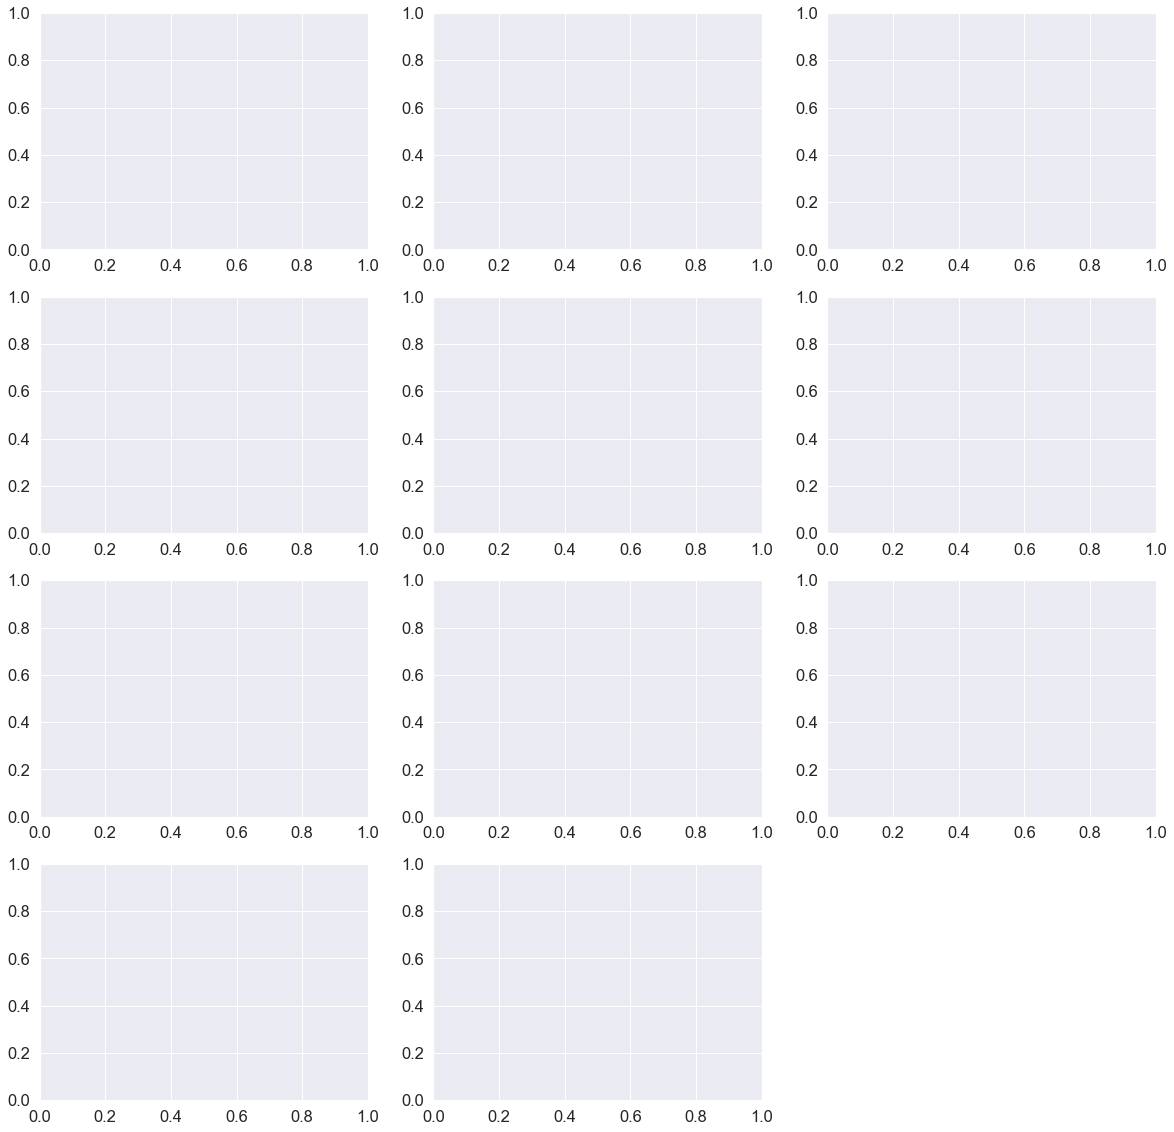

In [53]:
# create histogram for each variabel to check normality.
import matplotlib.pyplot as plt
df.hist(bins = 30, figsize= (20, 20) )
plt.show()

 Dataset is clean and has no missing values. Few parameters are normal except TIT, TEY, TAT, GTEP, CO & AH.
 Furthemore, Standard devitaion is small for all parameters hence most of data is close to mean.
 Data will be normalized before splitting it into training & testing data.

<AxesSubplot:>

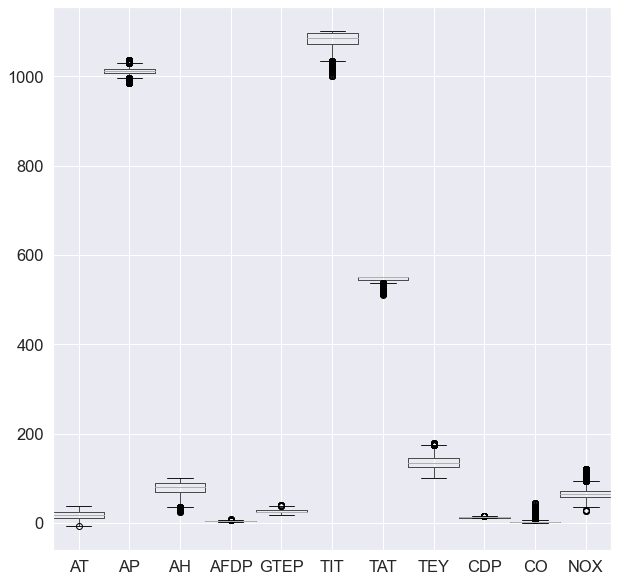

In [54]:
# Check the outliers 

df.boxplot(figsize = (10, 10), widths = 1)

The boxplot shows that more input variables are outliers, so I'll use mean absolute error (MAE) to evaluate the model in modeling. The MAE is not sensitive to the outliers

# 3. Feature selection Filter Based Tecnhiques
## 3.1 Feature Selection with the help of correlation

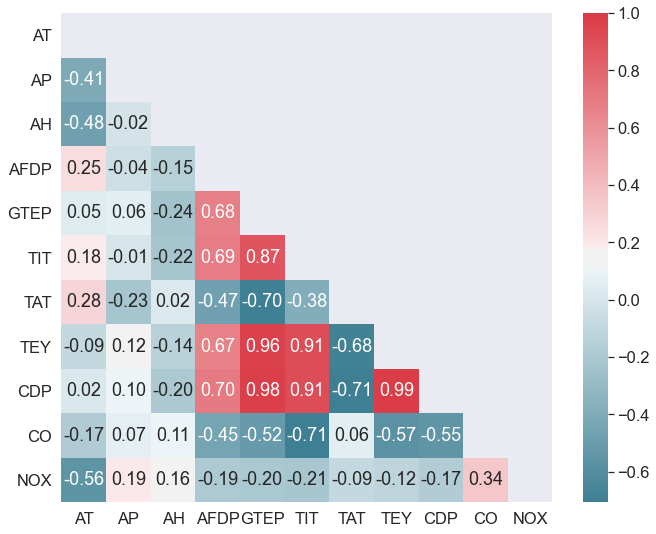

In [55]:
# let's visualize the correlation thru heatmap
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

The heatmap above shows the correlation between features and output variables(CO and NOx). It is easy to see that some features are negatively correlated each other. For example, the correlation between TIT and CO is -0.71, and it means that when the Turbine Inlet Temperature (TIT) decreases, the gas-turbine engine will produce more CO because a low TIT reduces the efficiency of the gas-turbine engine(look at the figure below).
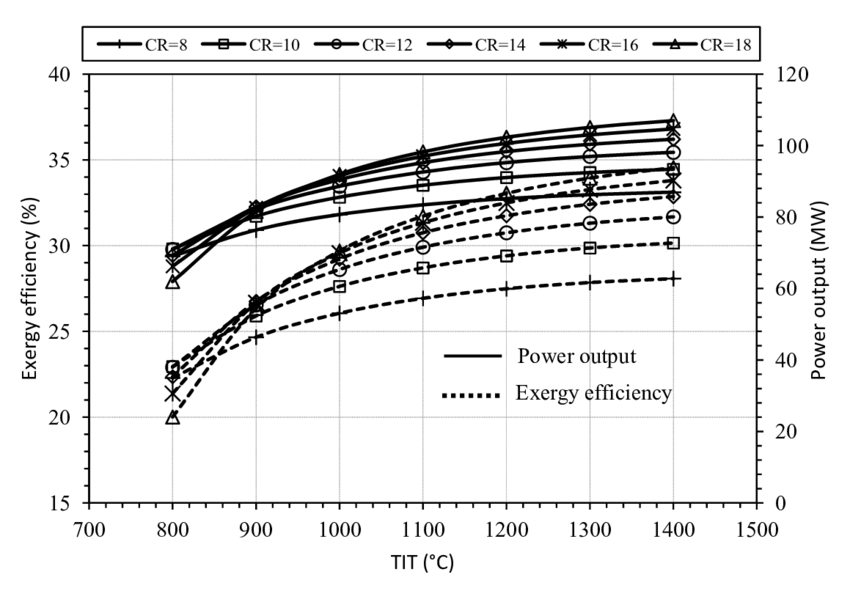

In [56]:
X = df.drop(columns = ['CO', 'NOX'])
Y_CO = df[['CO']]
Y_NOX = df[['NOX']]
print(X)
print(Y_CO)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910
...       ...     ...     ...     ...     ...     ...     ...     ...     ...
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462

[36733 rows x 9 columns]
             CO
0       0.32663
1     

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

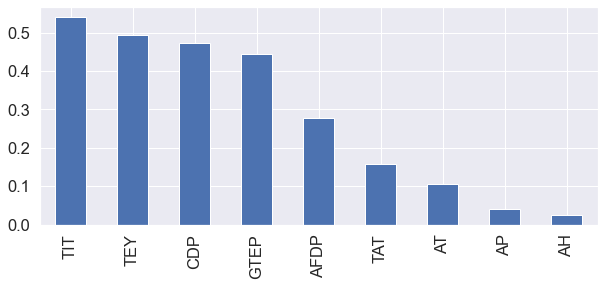

In [57]:
#Find the information gain or mutual information of the independent variable with respect to a target variable
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
mi_CO = mutual_info_regression(X, Y_CO)
mi_CO = pd.Series(mi_CO)
mi_CO.index = X.columns
mi_CO.sort_values(ascending=False)
mi_CO.sort_values(ascending=False).plot.bar(figsize=(10, 4))

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

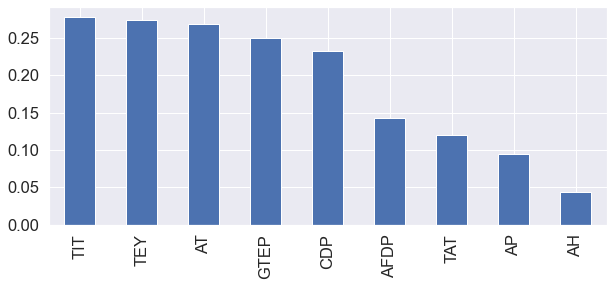

In [58]:
mi_NOX = mutual_info_regression(X, Y_NOX)
mi_NOX = pd.Series(mi_NOX)
mi_NOX.index = X.columns
mi_NOX.sort_values(ascending=False)
mi_NOX.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# 4 Wrapper technique for feature selection

In [59]:
!pip install mlxtend

## 4.1 Forward Selection — SFS() from mlxtend

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.49882444817014526],0.498824,"(TIT,)"
2,"(5, 6)",[0.5507217644680591],0.550722,"(TIT, TAT)"
3,"(2, 5, 6)",[0.5552174969842718],0.555217,"(AH, TIT, TAT)"
4,"(2, 5, 6, 7)",[0.5564461888633703],0.556446,"(AH, TIT, TAT, TEY)"
5,"(2, 5, 6, 7, 8)",[0.5581241617573389],0.558124,"(AH, TIT, TAT, TEY, CDP)"


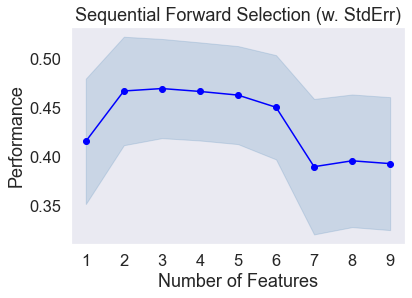

In [61]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs = SFS(LinearRegression(), 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X, Y_CO)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [62]:
sfs.fit(X, Y_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.3772186881848645, 0.02335901211707392, 0.09...",0.101282,"(AT,)"
2,"(0, 4)","[0.4375572055870701, 0.08253102232092047, 0.11...",0.141457,"(AT, GTEP)"
3,"(0, 4, 5)","[0.46127520723803206, 0.11786682141083127, 0.1...",0.165202,"(AT, GTEP, TIT)"
4,"(0, 4, 5, 6)","[0.4574368886284075, 0.17872145749274448, 0.20...",0.201565,"(AT, GTEP, TIT, TAT)"
5,"(0, 4, 5, 6, 7)","[0.4706119731078341, 0.30627659376343375, 0.30...",0.3373,"(AT, GTEP, TIT, TAT, TEY)"
6,"(0, 1, 4, 5, 6, 7)","[0.45982441375422856, 0.3154808646727236, 0.31...",0.339749,"(AT, AP, GTEP, TIT, TAT, TEY)"
7,"(0, 1, 4, 5, 6, 7, 8)","[0.4585681576319547, 0.3098772733868126, 0.311...",0.334031,"(AT, AP, GTEP, TIT, TAT, TEY, CDP)"
8,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.5247090226323172, 0.42793025624651726, 0.34...",0.330764,"(AT, AP, AH, GTEP, TIT, TAT, TEY, CDP)"
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5278778454801685, 0.4291409781303308, 0.218...",0.305416,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"


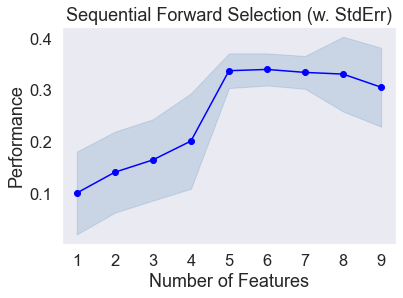

In [63]:
sfs = SFS(LinearRegression(), 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X, Y_NOX)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## 4.2 Backward elimination — RFE() from Sklearn

In [64]:
from sklearn.feature_selection import RFE
#Build a logistic regression model 
#model = LinearRegression()
#Define RFE 
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X, Y_CO)

features = X.columns.to_list()
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': features[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,AT,False,3
1,AP,False,5
2,AH,False,4
3,AFDP,True,1
4,GTEP,False,2
5,TIT,True,1
6,TAT,True,1
7,TEY,True,1
8,CDP,True,1


In [65]:
#Use RFE to select the top 5 features 
fit = rfe.fit(X, Y_NOX)

features = X.columns.to_list()
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': features[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,AT,True,1
1,AP,False,2
2,AH,False,4
3,AFDP,False,3
4,GTEP,False,5
5,TIT,True,1
6,TAT,True,1
7,TEY,True,1
8,CDP,True,1


# # backward elimintaion using SFS

In [66]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.5634322493233096],0.563432,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"
8,"(0, 2, 3, 4, 5, 6, 7, 8)",[0.5633593345177799],0.563359,"(AT, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"
7,"(0, 2, 4, 5, 6, 7, 8)",[0.5624599981695952],0.56246,"(AT, AH, GTEP, TIT, TAT, TEY, CDP)"
6,"(0, 2, 5, 6, 7, 8)",[0.5612057205079215],0.561206,"(AT, AH, TIT, TAT, TEY, CDP)"
5,"(0, 5, 6, 7, 8)",[0.5587001023065896],0.5587,"(AT, TIT, TAT, TEY, CDP)"


In [67]:
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",[0.5178226679212272],0.517823,"(AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP)"
8,"(0, 1, 2, 3, 5, 6, 7, 8)",[0.5177685010169375],0.517769,"(AT, AP, AH, AFDP, TIT, TAT, TEY, CDP)"
7,"(0, 1, 2, 3, 5, 6, 7)",[0.5176071570924646],0.517607,"(AT, AP, AH, AFDP, TIT, TAT, TEY)"
6,"(0, 1, 2, 5, 6, 7)",[0.5167645854414764],0.516765,"(AT, AP, AH, TIT, TAT, TEY)"
5,"(0, 2, 5, 6, 7)",[0.5031467462217525],0.503147,"(AT, AH, TIT, TAT, TEY)"


## 4.3 Step-wise Selection — SFFS() from mlxtend

In [68]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_CO)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.49882444817014526],0.498824,"(TIT,)"
2,"(5, 6)",[0.5507217644680591],0.550722,"(TIT, TAT)"
3,"(2, 5, 6)",[0.5552174969842718],0.555217,"(AH, TIT, TAT)"
4,"(2, 5, 6, 7)",[0.5564461888633703],0.556446,"(AH, TIT, TAT, TEY)"
5,"(2, 5, 6, 7, 8)",[0.5581241617573389],0.558124,"(AH, TIT, TAT, TEY, CDP)"


In [69]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y_NOX)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.31155773122511365],0.311558,"(AT,)"
2,"(0, 4)",[0.34261205608496104],0.342612,"(AT, GTEP)"
3,"(0, 2, 4)",[0.369117213791586],0.369117,"(AT, AH, GTEP)"
4,"(0, 2, 3, 4)",[0.3870041880302296],0.387004,"(AT, AH, AFDP, GTEP)"
5,"(0, 2, 3, 4, 5)",[0.3947387026237553],0.394739,"(AT, AH, AFDP, GTEP, TIT)"


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


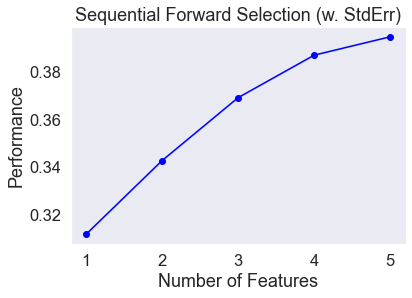

In [70]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# 5. Embedded Feature Selection Methods

## 5.1 Random Forest

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [72]:
# Normalize feature vector
X1 = StandardScaler().fit_transform(X)
# Split the dataset
X_train, X_test, y_train_CO, y_test_CO = train_test_split(X1, Y_CO, test_size = 0.30)

# selecting the features
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100,max_features=5))
sel.fit(X_train, y_train_CO)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor(max_features=5))

In [73]:
selected_feat= X.columns[(sel.get_support())]
sel.get_support().sum()

print(selected_feat)

Index(['TIT', 'TAT', 'TEY'], dtype='object')


## 5.2 Lasso Regression

In [75]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
# Split the dataset
X_train, X_test, y_train_CO, y_test_CO = train_test_split(X1, Y_CO, test_size = 0.30, random_state = 0)

lcv.fit(X_train, y_train_CO)

print("Best alpha using built-in LassoCV: %f" % lcv.alpha_)
print("Best score using built-in LassoCV: %f" %lcv.score(X_train,y_train_CO))
coef = pd.Series(lcv.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.001593
Best score using built-in LassoCV: 0.559507
Lasso picked 9 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

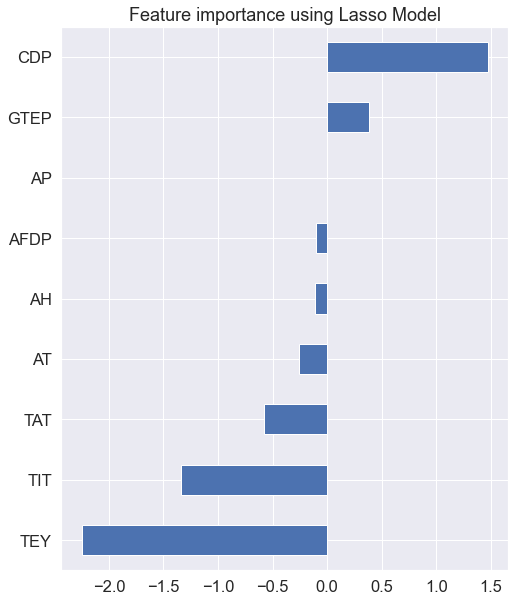

In [76]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")